In [1]:
from utils.tf import *
from utils.db import *
from utils.gd import * 
from utils.clt_repetidos import *
from datetime import datetime
import cx_Oracle
import pandas as pd
import os
from rapidfuzz import process, fuzz
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [84]:
df_productos = pd.read_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/productos_clientes_SIRAC.dat", low_memory=False)

In [86]:
res1 = df_productos[df_productos["AÑO_VENCIMIENTO"] == 2264]

In [16]:
df_productos.loc[df_productos["AÑO_VENCIMIENTO"] == 2264, "FECHA_VENCIMIENTO"] = datetime(2031, 7, 31)
df_productos.loc[df_productos["AÑO_VENCIMIENTO"] == 2264, "MES_VENCIMIENTO"] = 7
df_productos.loc[df_productos["AÑO_VENCIMIENTO"] == 2264, "DIA_VENCIMIENTO"] = 31   
df_productos.loc[df_productos["AÑO_VENCIMIENTO"] == 2264, "AÑO_VENCIMIENTO"] = 2031


In [75]:
res = df_productos[(df_productos["AÑO_VENCIMIENTO"] == 2025) & (df_productos["MES_VENCIMIENTO"] == 2)]

In [ ]:
res

/tmp/ipykernel_20929/3474242286.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["FECHA_VENCIMIENTO"] = pd.to_datetime(res["FECHA_VENCIMIENTO"])


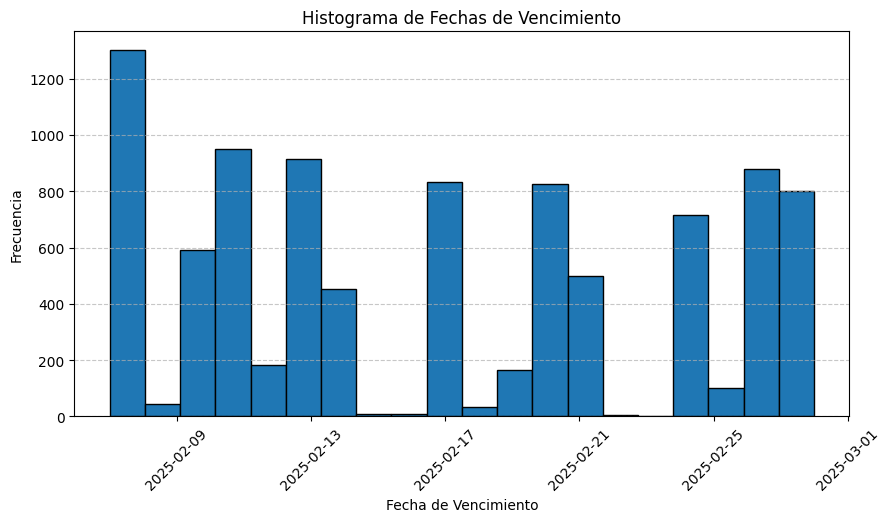

In [76]:
import matplotlib.pyplot as plt
import pandas as pd



# Convertir la columna a formato datetime por si no lo está
res["FECHA_VENCIMIENTO"] = pd.to_datetime(res["FECHA_VENCIMIENTO"])

# Crear el histograma
plt.figure(figsize=(10, 5))
plt.hist(res["FECHA_VENCIMIENTO"], bins=20, edgecolor="black")
plt.xlabel("Fecha de Vencimiento")
plt.ylabel("Frecuencia")
plt.title("Histograma de Fechas de Vencimiento")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()


## AGRUPADO AÑO CONTRATACIÓN Y CONTRATOS  

In [80]:
agrupado_año_contratos = (
    df_productos.groupby(["AÑO_REGISTRO"], as_index=False)
    .agg(
        numero_contratos = ("NUMERO_CONTRATO", "count"),
        suma_plazo = ("PLAZO", "sum"),
        plazo_promedio = ("PLAZO", lambda x: round(x.mean())),
        maximo = ("PLAZO", 'max'),
        minimo = ("PLAZO", 'min') 
    ).assign(plazo_promedio_ponderado = lambda df: round(df['suma_plazo'] / df['numero_contratos']))
).sort_values("AÑO_REGISTRO")

In [81]:
agrupado_año_contratos

,AÑO_REGISTRO,numero_contratos,suma_plazo,plazo_promedio,maximo,minimo,plazo_promedio_ponderado
0,2007,1,7160.0,7160,7160.0,7160.0,7160.0
1,2008,6,40453.0,6742,7195.0,6117.0,6742.0
2,2009,10,67631.0,6763,7193.0,6221.0,6763.0
3,2010,8,50988.0,6374,7224.0,5425.0,6374.0
4,2011,3,19484.0,6495,7104.0,6187.0,6495.0
5,2012,4,26624.0,6656,7202.0,6060.0,6656.0
6,2013,17,77883.0,5192,7188.0,4761.0,4581.0
7,2014,12,60929.0,5077,7258.0,4443.0,5077.0
8,2015,26,139678.0,5372,7283.0,3390.0,5372.0
9,2016,82,518858.0,6328,7951.0,3040.0,6328.0


In [24]:
agrupado_año_contratos.to_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados/agrupado_año_contratos.csv",index=False)

In [48]:
agrupado_año_mes_contratos = (
    df_productos.groupby(["AÑO_REGISTRO","MES_REGISTRO"], as_index=False)
    .agg(
        numero_contratos = ("NUMERO_CONTRATO", "count"),
        plazo_promedio = ("PLAZO", lambda x: round(x.mean()) if not x.isna().all() else 0 ),
        maximo = ("PLAZO", 'max'),
        minimo = ("PLAZO", 'min') 
    )
).sort_values(["AÑO_REGISTRO","MES_REGISTRO"])

In [49]:
agrupado_año_mes_contratos = agrupado_año_mes_contratos.dropna()

In [50]:
agrupado_año_mes_contratos.to_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados/agrupado_año_mes_contratos.csv",index=False)

In [83]:
agrupado_año_mes_contratos[agrupado_año_mes_contratos["AÑO_REGISTRO"]==2024]

,AÑO_REGISTRO,MES_REGISTRO,numero_contratos,plazo_promedio,maximo,minimo
136,2024,1,118,1408,2168.0,576.0
137,2024,2,80,1524,5456.0,360.0
138,2024,3,88,1379,1843.0,328.0
139,2024,4,157,1423,2046.0,305.0
140,2024,5,126,1367,2979.0,269.0
141,2024,6,149,1337,5452.0,236.0
142,2024,7,183,1219,4930.0,196.0
143,2024,8,1928,262,3261.0,161.0
144,2024,9,3568,225,2529.0,57.0
145,2024,10,8716,153,3623.0,99.0


In [52]:
agrupado_año_mes_contratos

,AÑO_REGISTRO,MES_REGISTRO,numero_contratos,plazo_promedio,maximo,minimo
0,2007,4,1,7160,7160.0,7160.0
1,2008,5,1,6623,6623.0,6623.0
2,2008,8,3,7085,7195.0,6864.0
3,2008,9,2,6288,6459.0,6117.0
4,2009,1,3,6445,6894.0,6221.0
...,...,...,...,...,...,...
144,2024,9,3568,225,2529.0,57.0
145,2024,10,8716,153,3623.0,99.0
146,2024,11,3003,139,2165.0,30.0
147,2024,12,90,764,1831.0,49.0


# AGRUPADO AÑO VENCIMIENTO Y CONTRATOS

In [25]:
agrupado_año_vencimiento_contratos = (
    df_productos.groupby(["AÑO_VENCIMIENTO"], as_index=False)
    .agg(
        numero_contratos = ("NUMERO_CONTRATO", "count"),
    )
).sort_values("AÑO_VENCIMIENTO")

In [27]:
agrupado_año_vencimiento_contratos.to_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados/agrupado_año_vencimiento_contratos.csv", index=False)

In [46]:
agrupado_año_mes_vencimiento_contratos =  (
    df_productos.groupby(["AÑO_VENCIMIENTO","MES_VENCIMIENTO"], as_index=False)
    .agg(
        numero_contratos = ("NUMERO_CONTRATO", "count"),
    )
).sort_values(["AÑO_VENCIMIENTO","MES_VENCIMIENTO"])

In [51]:
agrupado_año_mes_vencimiento_contratos.to_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados/agrupado_año_mes_vencimiento_contratos.csv", index=False)

## Productos y tiempo 

In [55]:
df_productos.columns

Index(['CODIGO_CLIENTE', 'CODIGO_TIPO_IDENTIFICACION', 'NOMBRES',
       'PRIMER_APELLIDO', 'SEGUNDO_APELLIDO', 'SEXO', 'FECHA_DE_NACIMIENTO',
       'RAZON_SOCIAL', 'NOMBRE_COMERCIAL', 'NO_EMPLEADOS', 'VENTAS_NETAS',
       'PAIS', 'NACIONALIDAD', 'DELEGACION_MUNICIPIO', 'ENTIDAD_FEDERATIVA',
       'TIPO_SECTOR', 'TIPO_SUBSECTOR', 'TIPO_RAMA', 'TIPO_CLASE',
       'NUMERO_CONTRATO', 'NUMERO_PRESTAMO', 'FECHA_APERTURA', 'AÑO_REGISTRO',
       'MES_REGISTRO', 'DIA_REGISTRO', 'FECHA_VENCIMIENTO', 'AÑO_VENCIMIENTO',
       'MES_VENCIMIENTO', 'DIA_VENCIMIENTO', 'PRODUCTO',
       'DESC_LINEA_FINANCIERA', 'CODIGO_MONEDA', 'MONTO_APROBADO',
       'MONTO_DISPONIBLE', 'MONTO_INICIAL', 'TIPO_TASA', 'TASA_TOTAL', 'PLAZO',
       'CODIGO_TIPO_AMORTIZACION', 'AMORTIZACION', 'NUMERO_CUOTAS',
       'VALOR_CUOTA', 'CANTIDAD_CUOTAS_PAGADAS'],
      dtype='object')

In [67]:
agrupado_producto_clts = (
    df_productos.groupby(["AÑO_REGISTRO"], as_index=False)
    .agg(
        cantidad_productos = ("DESC_LINEA_FINANCIERA", "nunique"),
    )
).sort_values("cantidad_productos", ascending=False)

In [68]:
agrupado_producto_clts

,AÑO_REGISTRO,cantidad_productos
17,2024,10
16,2023,8
15,2022,7
14,2021,7
13,2020,6
9,2016,5
12,2019,5
11,2018,5
10,2017,4
8,2015,3


In [71]:
agrupado_producto_clts = (
    df_productos.groupby(["AÑO_REGISTRO"], as_index=False)
    .agg(
        cantidad_linea = ("DESC_LINEA_FINANCIERA", "nunique"),
        lineas_financieras=("DESC_LINEA_FINANCIERA", lambda x: list(x.unique()))
    )
).sort_values("AÑO_REGISTRO")


In [72]:
agrupado_producto_clts

,AÑO_REGISTRO,cantidad_linea,lineas_financieras
0,2007,1,[CREDITOS PARA LA VIVIENDA CON DOCUMENTO]
1,2008,1,[CREDITOS PARA LA VIVIENDA CON DOCUMENTO]
2,2009,1,[CREDITOS PARA LA VIVIENDA CON DOCUMENTO]
3,2010,1,[CREDITOS PARA LA VIVIENDA CON DOCUMENTO]
4,2011,1,[CREDITOS PARA LA VIVIENDA CON DOCUMENTO]
5,2012,1,[CREDITOS PARA LA VIVIENDA CON DOCUMENTO]
6,2013,2,"[DIRECTO CON DOCUMENTO, CREDITOS PARA LA VIVIE..."
7,2014,2,"[DIRECTO CON DOCUMENTO, CREDITOS PARA LA VIVIE..."
8,2015,3,"[DIRECTO CON DOCUMENTO, CREDITOS PARA LA VIVIE..."
9,2016,5,"[DIRECTO SIN DOCUMENTO, 2DO. PISO, BANCARIO, 2..."


In [53]:
mdata_area

[[2007, 1],
 [2008, 5],
 [2009, 8],
 [2010, 5],
 [2011, 3],
 [2012, 4],
 [2013, 8],
 [2014, 5],
 [2015, 11],
 [2016, 21],
 [2017, 16],
 [2018, 21],
 [2019, 27],
 [2020, 199],
 [2021, 1051],
 [2022, 957],
 [2023, 736],
 [2024, 2206],
 [2025, 3]]

In [51]:
agrupado_pais

,AÑO_REGISTRO,clientes
0,2007,1
1,2008,5
2,2009,8
3,2010,5
4,2011,3
5,2012,4
6,2013,8
7,2014,5
8,2015,11
9,2016,21


In [41]:
agrupado_año =(
        df_productos.groupby(["AÑO_REGISTRO", "MES_REGISTRO"], as_index=False)
        .agg(
            CLIENTES =  ("CODIGO_CLIENTE", "nunique"),
            NUMERO_CONTRATOS = ("NUMERO_CONTRATO", "count"),
            PROMEDIO_MONTO_INICIAL =  ("MONTO_INICIAL", 'mean'),
            PROMEDIO_TASA_INTERES = ("TASA_TOTAL", 'mean')    
        ))

In [42]:
agrupado_año

,AÑO_REGISTRO,MES_REGISTRO,CLIENTES,NUMERO_CONTRATOS,PROMEDIO_MONTO_INICIAL,PROMEDIO_TASA_INTERES
0,2007,4,1,1,1.155365e+06,12.250000
1,2008,5,1,1,1.306945e+06,6.250000
2,2008,8,2,3,1.293165e+06,6.250000
3,2008,9,2,2,3.500194e+05,6.250000
4,2009,1,2,3,3.008405e+05,6.250000
...,...,...,...,...,...,...
144,2024,9,323,3625,3.942151e+06,12.095701
145,2024,10,1260,9144,1.355347e+06,11.745521
146,2024,11,623,3030,7.276601e+05,11.579897
147,2024,12,38,90,1.202499e+06,10.376326


In [ ]:
import matplotlib.pyplot as plt

# Obtener los años únicos
años_unicos = agrupado_año["AÑO_REGISTRO"].unique()

# Crear subgráficos en función de la cantidad de años
fig, axes = plt.subplots(len(años_unicos), 1, figsize=(10, 6 * len(años_unicos)), sharex=True)

# Si hay solo un año, convertir axes en lista para iterar
if len(años_unicos) == 1:
    axes = [axes]

# Iterar sobre cada año y graficar
for ax, año in zip(axes, años_unicos):
    df_año = agrupado_año[agrupado_año["AÑO_REGISTRO"] == año]
    ax.bar(df_año["MES_REGISTRO"], df_año["CLIENTES"], color='blue', alpha=0.7)
    ax.set_title(f"Año {año}")
    ax.set_ylabel("Número de Clientes")
    ax.set_xticks(range(1, 13))  # Asegurar que los meses sean del 1 al 12
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Etiqueta del eje X común
plt.xlabel("Mes de Registro")
plt.suptitle("Número de Clientes por Mes y Año", fontsize=16, y=1.02)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


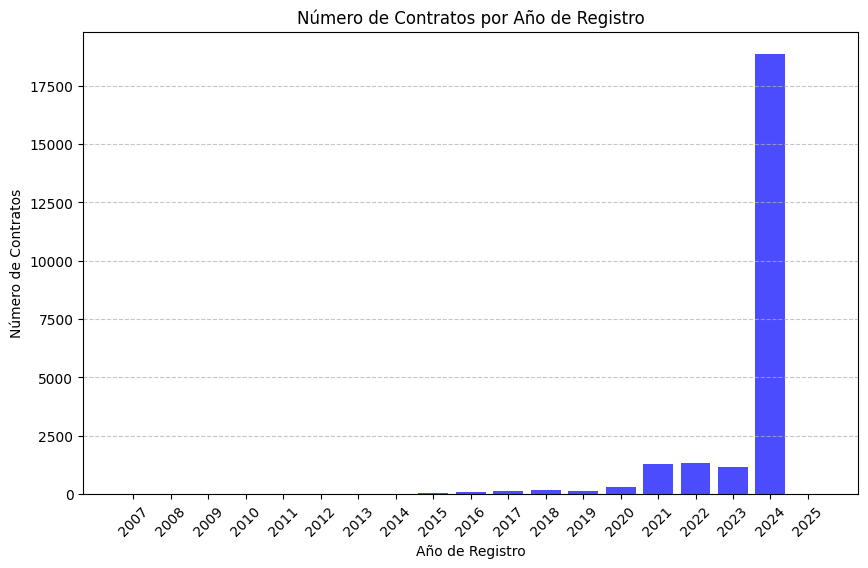

In [33]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(agrupado_año["AÑO_REGISTRO"].astype(str), agrupado_año["NUMERO_CONTRATOS"], color='blue', alpha=0.7)

# Ajustes de la gráfica
plt.xlabel("Año de Registro")
plt.ylabel("Número de Contratos")
plt.title("Número de Contratos por Año de Registro")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()


In [31]:
agrupado_año[agrupado_año["AÑO_REGISTRO"] == 2025]

,AÑO_REGISTRO,MES_REGISTRO,CLIENTES,NUMERO_CONTRATOS,FECHA
148,2025,1,3,5,2025-01-01


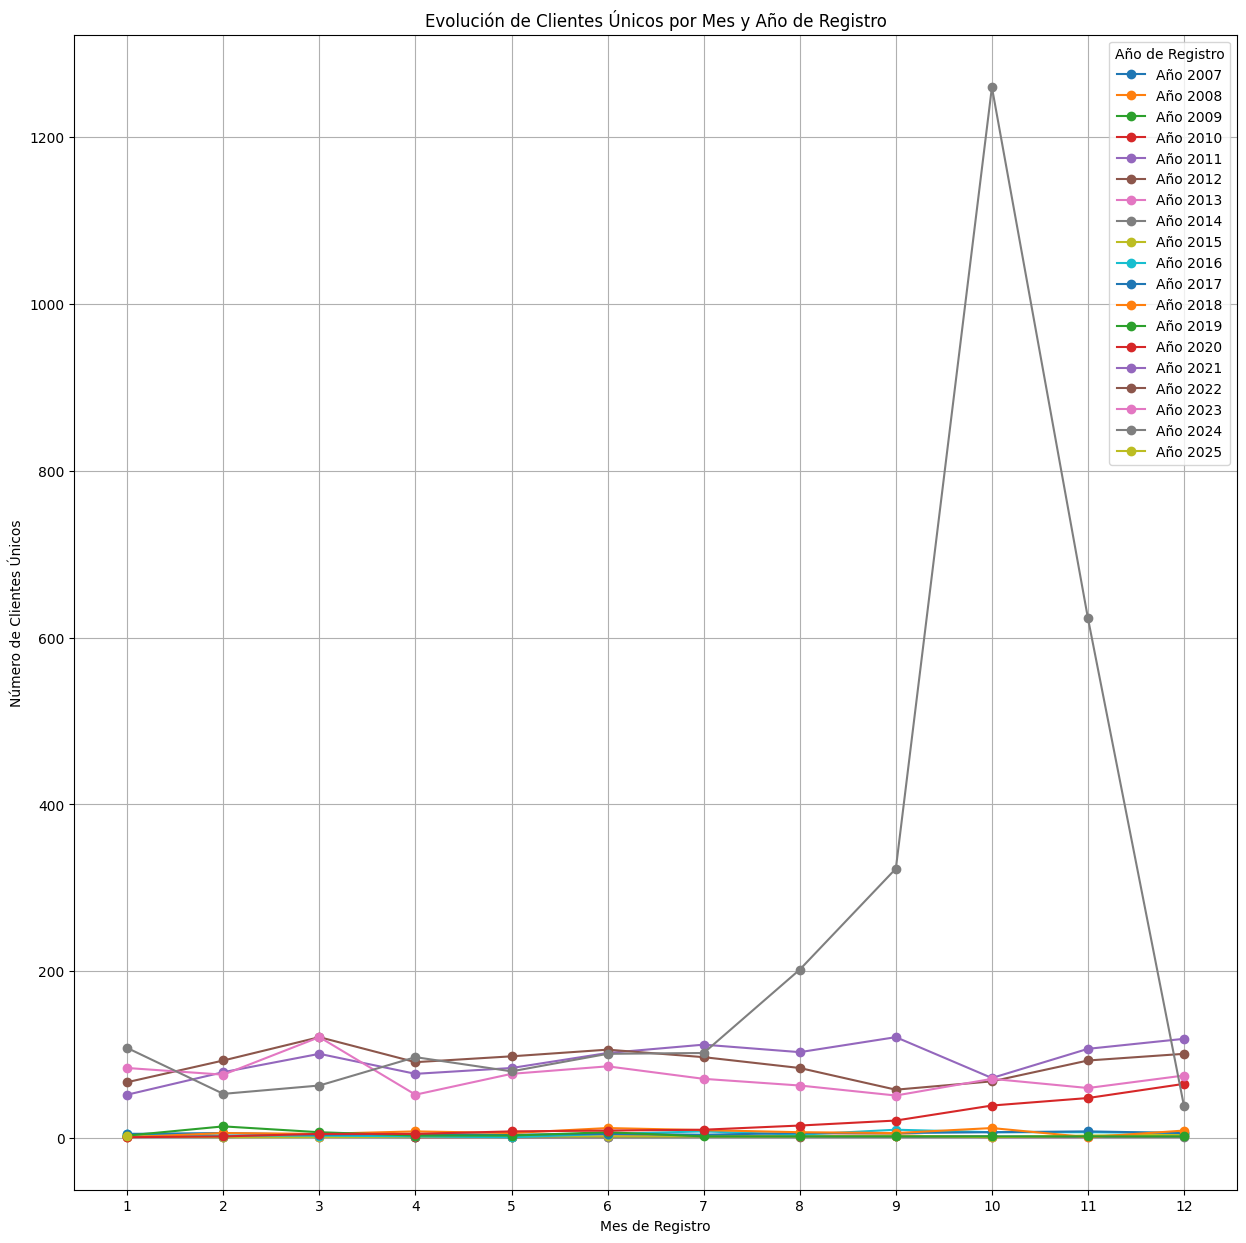

In [29]:
# Crear la gráfica de líneas con cada año como una línea separada
plt.figure(figsize=(15, 15))

# Obtener los años únicos
años_unicos = agrupado_año["AÑO_REGISTRO"].unique()

# Graficar cada año por separado
for año in años_unicos:
    df_año = agrupado_año[agrupado_año["AÑO_REGISTRO"] == año]
    plt.plot(df_año["MES_REGISTRO"], df_año["CLIENTES"], marker='o', linestyle='-', label=f"Año {año}")

# Ajustes de la gráfica
plt.xlabel("Mes de Registro")
plt.ylabel("Número de Clientes Únicos")
plt.title("Evolución de Clientes Únicos por Mes y Año de Registro")
plt.xticks(range(1, 13))  # Asegurar que los meses vayan del 1 al 12
plt.legend(title="Año de Registro")
plt.grid(True)

# Mostrar la gráfica
plt.show()



In [18]:
print(agrupado_año.to_string(max_rows=None))

     AÑO_REGISTRO  MES_REGISTRO  CLIENTES  NUMERO_CONTRATOS
0            2007             4         1                 1
1            2008             5         1                 1
2            2008             8         2                 3
3            2008             9         2                 2
4            2009             1         2                 3
5            2009             4         1                 1
6            2009             6         1                 2
7            2009             9         2                 2
8            2009            10         2                 2
9            2010             4         1                 1
10           2010             9         3                 6
11           2010            10         1                 1
12           2011             5         1                 1
13           2011            11         2                 2
14           2012             2         1                 1
15           2012             3         

In [ ]:
df_productos
    .groupby(['AÑO', 'MES'], as_index=False)
    .agg(
        INTERMEDIARIOS=('CODIGO_CLIENTE', 'nunique'),  # Número de clientes distintos
        GARANTIAS=('NUMERO_DE_GARANTIA', 'count'),  # Número total de garantías
        SUMA_MENSUAL_MONTO_GARANTIZADO = ('MONTO_GARANTIZADO', 'sum'),
        TOTAL_MENSUAL_GANANCIA = ('GANANCIA','sum'),
        PROMEDIO_MENSUAL_COMISION = ('PORCENTAJE_COMISION',lambda x: round(x.mean() , 4))
    ).sort_values(by=['AÑO', 'MES'])

In [7]:
df_productos[df_productos.duplicated(subset=("CODIGO_CLIENTE"))]

,CODIGO_CLIENTE,CODIGO_TIPO_IDENTIFICACION,NOMBRES,PRIMER_APELLIDO,SEGUNDO_APELLIDO,SEXO,FECHA_DE_NACIMIENTO,RAZON_SOCIAL,NOMBRE_COMERCIAL,NO_EMPLEADOS,...,MONTO_DISPONIBLE,MONTO_INICIAL,TIPO_TASA,TASA_TOTAL,PLAZO,CODIGO_TIPO_AMORTIZACION,AMORTIZACION,NUMERO_CUOTAS,VALOR_CUOTA,CANTIDAD_CUOTAS_PAGADAS
2,99003,7,NaN,NaN,NaN,NaN,NaN,CAFE EL MARINO,CAFE EL MARINO,249,...,0.0,5886.97,6.0,12.6743,146.0,1.0,CAPITAL E INTERES AL VCTO,1.0,6189.19,0.0
3,99003,7,NaN,NaN,NaN,NaN,NaN,CAFE EL MARINO,CAFE EL MARINO,249,...,0.0,5930.55,6.0,12.6743,132.0,1.0,CAPITAL E INTERES AL VCTO,1.0,6206.43,0.0
5,123173,7,NaN,NaN,NaN,NaN,NaN,"SCHETTINO HERMANOS, S. DE R.L. DE C.V.","SCHETTINO HERMANOS, S. DE R.L. DE C.V.",281,...,0.0,258057.03,6.0,11.6871,173.0,1.0,CAPITAL E INTERES AL VCTO,1.0,272550.97,0.0
7,128196,7,NaN,NaN,NaN,NaN,NaN,ALIMENTOS COMPEAN S.A. DE CV,ALIMENTOS COMPEAN S.A. DE CV,50,...,0.0,80915.74,6.0,12.1526,168.0,1.0,CAPITAL E INTERES AL VCTO,1.0,85503.82,0.0
8,128196,7,NaN,NaN,NaN,NaN,NaN,ALIMENTOS COMPEAN S.A. DE CV,ALIMENTOS COMPEAN S.A. DE CV,50,...,0.0,41021.74,6.0,12.1526,168.0,1.0,CAPITAL E INTERES AL VCTO,1.0,43348.54,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23398,28949177,5,MARGARITA,PARADA,RUVALCABA,F,1972-09-07 00:00:00,NaN,NaN,4,...,0.0,501935.00,6.0,11.7283,168.0,1.0,CAPITAL E INTERES AL VCTO,1.0,529406.36,0.0
23417,28950290,7,NaN,NaN,NaN,NaN,NaN,MURANO PV S.A DE C.V.,MURANO PV S.A DE C.V.,1,...,0.0,2087953.60,5.0,8.3672,1084.0,2.0,INT. MENSUAL Y CAP. AL VENC.,12.0,31058.56,0.0
23427,28950656,5,GEORGINA ALEJANDRA,DE AGUINAGA,INURRIAGA,F,2000-01-19 00:00:00,NaN,NaN,1,...,0.0,133327.15,0.0,11.6600,1795.0,5.0,PLAN DE PAGOS,30.0,2804.63,0.0
23438,28958014,7,NaN,NaN,NaN,NaN,NaN,OPERACION Y MANTENIMIENTO A ESTACIONES DE GAS ...,OMEGAS,19,...,0.0,20000000.00,5.0,6.7976,396.0,2.0,INT. MENSUAL Y CAP. AL VENC.,13.0,117069.64,NaN
